# Creating an End-to-End Data Science Project in Python3
---
This code was written by **Edmar Junyor Bevilaqua**, if you want to know a little more about me, feel free to visit my social media:
* <a href="https://www.linkedin.com/in/edmar-bevilaqua/">LinkedIn</a>
* <a href="https://github.com/edmar-bevilaqua">GitHub</a>
* <a href="https://www.instagram.com/edmar_bevilaqua/">Instagram</a>

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

### Note:
The following function was created based on the book _"Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow"_, written by <a href="https://github.com/ageron">**Aurélien Géron**</a> and published by <a href="https://www.oreilly.com/">**O'Reilly**</a>. <br>
<br>
### But what the function _load_data_file()_ actually do?
It will look at the directory where the .ipynb file is running and check if theres a directory called **_/datasets/_** with a file called **_housing.tgz_**, if it does not exists, the code will download it from the web with the url passed inside the function. <br>
It will then extract all the contents inside the .tgz file and finally it will return a DataFrame.

In [2]:
def load_data_file():
    data_path = Path("datasets/housing.tgz")
    if not data_path.is_file():
        Path("./datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, data_path)
        with tarfile.open(data_path) as housing_tarball:
            housing_tarball.extractall(path="./datasets")
    return pd.read_csv(Path("./datasets/housing/housing.csv"))

In [3]:
housing = load_data_file()

### Taking a quick look at our data:

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


It is possible to see that the feature called "_total_bedrooms_" has 20433 non-null values, while the other features hold 20640 non-null values each. So we will need to check this feature later.<br><br>
Another thing we can look at is the Dtype (data type) of our features. In this case we have just 2 different Dtyes: float64 and object. While float64 is self-explanatory, the "_object_" Dtype can be a little tricky, because it represents any object type from Python, but as we know that the data has came from a .csv file, we know that the _ocean_proximity_ feature is a text feature (string).

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Tip:
We can always use _Data Visualization_ in the beggining of our project to check the behavior of our data

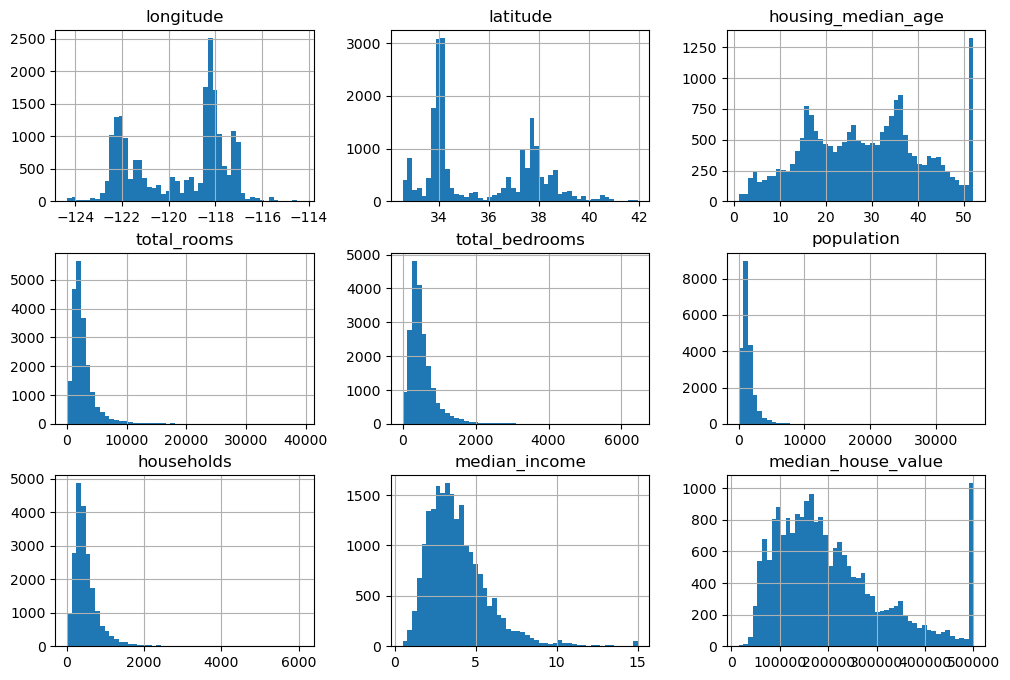

In [7]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))
plt.show()

There are some useful insights we can get from this histogram:<br>
* The median income attribute does not look like it is being represent in terms of coin values (like USD). After checking with the team that collected the data, we were told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent tens of thousands of dollars (x 10,000$);
* The housing median age and the median house value were also capped, this can be a problem for us, because our Machine Learning algorithms may learn that prices never go beyond that limit;
* These attributes have very different scales;
* Many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns.<br><br>

### Creating a Test Set:
---
It may seem a little odd to create a test set at this stage of our data science project, but it will help us understanding that the **_Test Set_** is meant to represent a new data, never seen by the algorithm neither by the data scientist.<br>
You problably already know that scikit-learn offers a series of useful tools to manipulate data, such as the _train_test_split_ method, but for educational and practical experiments, we will be coding those methods _by hand_.

In [8]:
import numpy as np

def shuffled_split(data, test_ratio):
    random_indices = np.random.permutation(len(data))
    test_len = int(len(data)*test_ratio) # Number of instances for the test set, defined by the test_ratio
    test_indices = random_indices[:test_len] # Get the indices, shuffled by np.random.permutation from 0 to test_len
    train_indices = random_indices[test_len:] # Get the indices, shuffled by np.random.permutation from test_len to len(data)+1
    
    return data.iloc[train_indices], data.iloc[test_indices]

#### There is a problem with the above **_shuffled_split_** method, do you know what it is?
First of all, if we look at the code, we are calling the _numpy random_, which runs at a random seed every time, so if we run this method multiple times, it will always generate different indices for our train and test sets. It can be a problem if our project needs to re-run the train/test sets more than once.<br>
To solve this, we can compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across  ultiple runs, even if you refresh the dataset. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

In [9]:
from zlib import crc32

def test_set_id_checker(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def shuffled_split_with_id(data, test_ratio, identifier):
    ids = data[identifier]
    is_in_test_set = ids.apply(lambda id_: test_set_id_checker(id_, test_ratio))
    return data.loc[~is_in_test_set], data.loc[is_in_test_set]

As we don't have a identifier columns in our dataset, we can get one by setting the index as a identifier columns, with the following code:

In [10]:
housing_with_id = housing.reset_index(drop=False) # This will return the housing DataFrame, but with the index as a column called "index".

The only problem in having the index as an identifier columns is that you can't delete rows in the preprocessing phase, because this will re-arange the dataset indices every time it runs the _DataFrame.reset_index()_ method.

In [11]:
train_set, test_set = shuffled_split_with_id(housing_with_id, 0.2, "index")

### INSERT TEXT HERE

In [12]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [13]:
housing['income_category'] = pd.cut(housing['median_income'],
                                    bins = [0., 1.5, 3., 4.5, 6., np.inf],
                                    labels = [1, 2, 3, 4, 5])

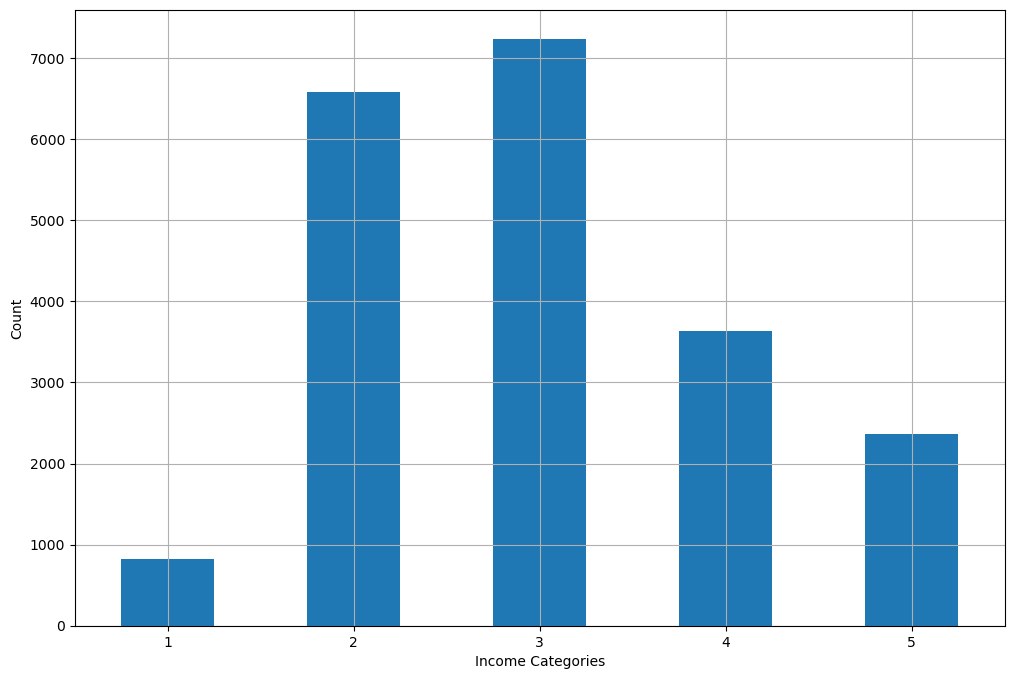

In [14]:
housing['income_category'].value_counts().sort_index().plot.bar(rot=0, grid=True, figsize=(12, 8))
plt.xlabel("Income Categories")
plt.ylabel("Count")
plt.show()

### INSERT TEXT HERE

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=192)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_category']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]
    strat_splits.append([strat_train_set, strat_test_set])

In [16]:
strat_train, strat_test = strat_splits[0]

In [17]:
strat_train['income_category'].value_counts()/len(strat_train['income_category'])

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_category, dtype: float64

In [18]:
strat_test['income_category'].value_counts()/len(strat_test['income_category'])

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_category, dtype: float64

The main reason we generated the "income_category" column was to sample the train and the test set in a stratified way, granting the same proportions from the original dataset "housing".

In [19]:
for set_ in (strat_train, strat_test):
    set_.drop("income_category", axis=1, inplace=True)

C:\Users\edmar\AppData\Local\Temp\ipykernel_13432\1503569653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_category", axis=1, inplace=True)
C:\Users\edmar\AppData\Local\Temp\ipykernel_13432\1503569653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_category", axis=1, inplace=True)


# Data Visualization:
---

-### Describe here some cool things about Data Visualization ###-

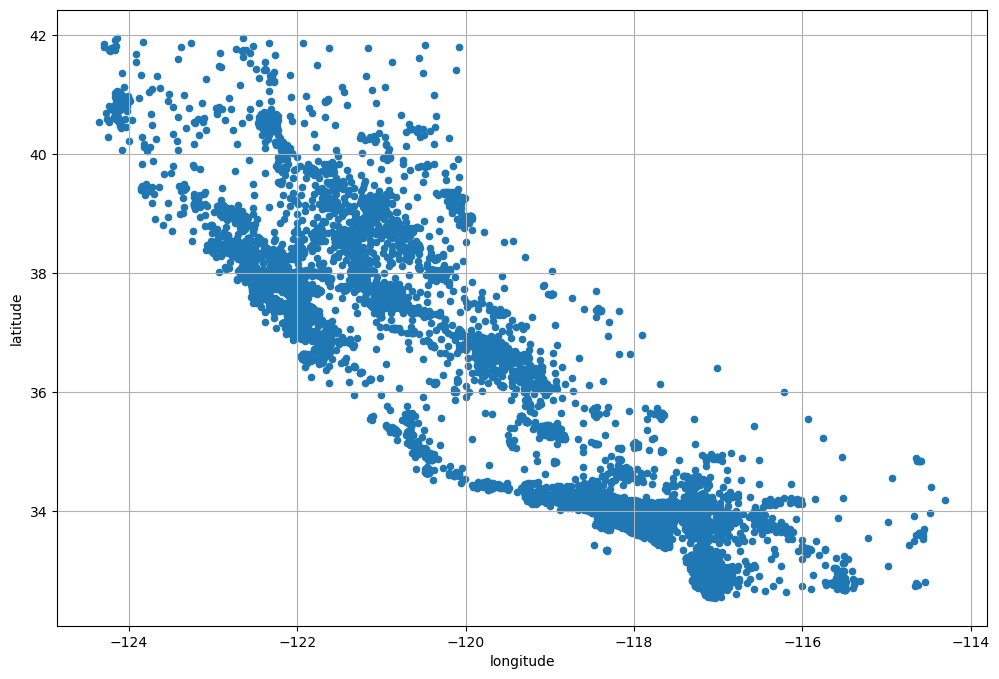

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, figsize=(12,8))
plt.show()

The above visualization is prety raw, and that makes it hard to really get somes insights from, so why don't we enhance the image with colors, opacity and a feature to complement the information?

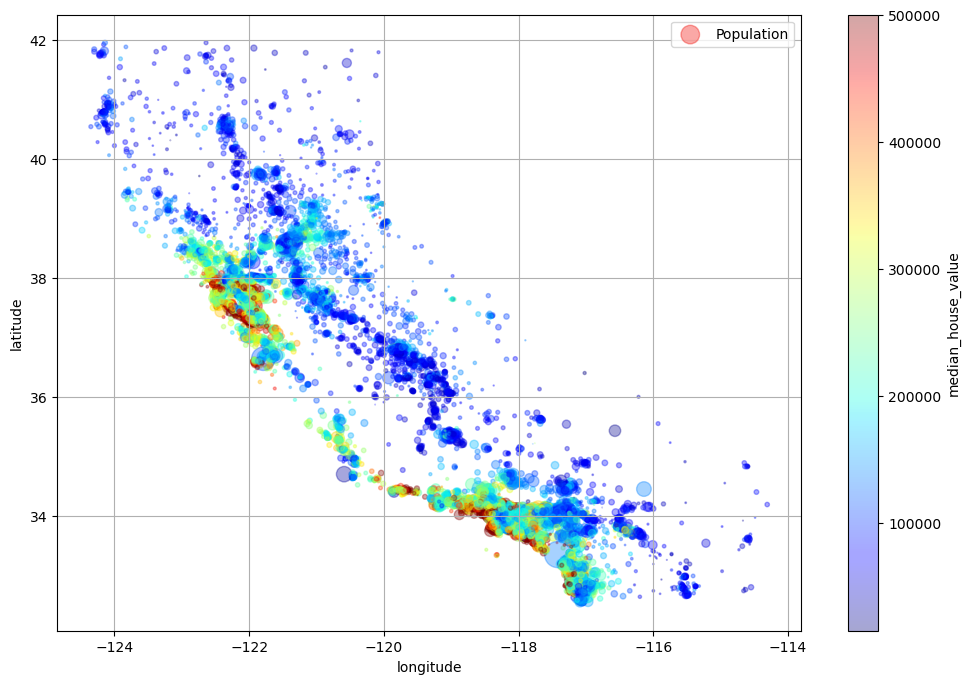

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             grid=True, figsize=(12,8), s=housing["population"]/100,
             label="Population", c="median_house_value", cmap="jet",
             alpha=0.35, colorbar=True, legend=True, sharex=False)
plt.show()

Looking for correlations (as known as _Pearson's r_) between every attribute. <br>
<br>
Note: There is no problem on calculating the correlation between every feature (attribute) on small datasets (like ours!), but when we are dealing with enormous datasets, the correlation is a metric that must be precisely calculated between selected features.

In [26]:
correlation_matrix = housing.corr(numeric_only=True)

In [34]:
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64